In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [3]:
datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [4]:
train_gen = datagen.flow_from_directory('dogscats/train/',
                                        class_mode='categorical',
                                        target_size = (150, 150),
                                        batch_size = 256,
                                       )

Found 23000 images belonging to 2 classes.


In [5]:
val_gen = datagen.flow_from_directory('dogscats/valid/',
                                      target_size = (150, 150),
                                  batch_size = 256
                                       )

Found 2000 images belonging to 2 classes.


In [6]:
for batch in train_gen:
    print(batch[0].shape)
    break

(256, 150, 150, 3)


In [7]:
from matplotlib import pyplot as plt

In [8]:
train_gen.batch_index

1

In [9]:
train_gen.filenames[21404]

'dogs/dog.844.jpg'

In [10]:
images_batch = next(train_gen)[0]

In [11]:
images_batch.shape

(256, 150, 150, 3)

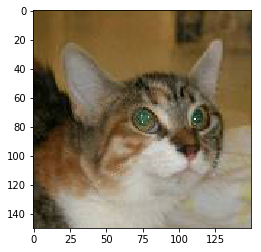

In [12]:
plt.imshow(images_batch[-1])
plt.show()

# Con capas densas

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [74]:
model = Sequential()
model.add(Flatten(input_shape=(150,150,3)))
model.add(Dense(2, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 67500)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 135002    
Total params: 135,002
Trainable params: 135,002
Non-trainable params: 0
_________________________________________________________________


In [75]:
from keras.optimizers import Adam

In [78]:
opt = Adam()
model.compile('adam', loss='binary_crossentropy', metrics=['accuracy'])

In [80]:
import keras
keras.__version__

'2.2.0'

In [77]:
model.fit_generator(train_gen, epochs=5, validation_data=val_gen, )

Epoch 1/5
66/90 [=====================>........] - ETA: 19s - loss: 7.8912 - acc: 0.4999

KeyboardInterrupt: 

# Con convolucionales

In [81]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Activation

In [82]:
model = Sequential()
model.add(Conv2D(16, 3, input_shape=(150,150,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(2))

model.add(Conv2D(32, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(2))

model.add(Conv2D(64, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(2))

model.add(Flatten()) 
# model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
activation_1 (Activation)    (None, 150, 150, 16)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 73, 73, 32)        4640      
_________________________________________________________________
activation_2 (Activation)    (None, 73, 73, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        18496     
__________

In [85]:
opt = Adam()
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit_generator(train_gen, epochs=50, validation_data=val_gen)

Epoch 1/50
90/90 [==============================] - 79s 877ms/step - loss: 0.6282 - acc: 0.6392 - val_loss: 0.5524 - val_acc: 0.7190
Epoch 2/50
90/90 [==============================] - 72s 805ms/step - loss: 0.5339 - acc: 0.7290 - val_loss: 0.5143 - val_acc: 0.7455
Epoch 3/50
90/90 [==============================] - 73s 806ms/step - loss: 0.4819 - acc: 0.7691 - val_loss: 0.4634 - val_acc: 0.7880
Epoch 4/50
90/90 [==============================] - 73s 807ms/step - loss: 0.4512 - acc: 0.7902 - val_loss: 0.4557 - val_acc: 0.7890
Epoch 5/50
90/90 [==============================] - 72s 805ms/step - loss: 0.4157 - acc: 0.8129 - val_loss: 0.4230 - val_acc: 0.7965
Epoch 6/50
90/90 [==============================] - 72s 802ms/step - loss: 0.3884 - acc: 0.8277 - val_loss: 0.4013 - val_acc: 0.8170
Epoch 7/50
90/90 [==============================] - 72s 806ms/step - loss: 0.3695 - acc: 0.8402 - val_loss: 0.3728 - val_acc: 0.8260
Epoch 8/50
90/90 [==============================] - 72s 804ms/step - 

In [52]:
model.save('cnn-50-epochs.hdf5')

In [57]:
from matplotlib import pyplot as plt

In [ ]:
model.history.history['tr']

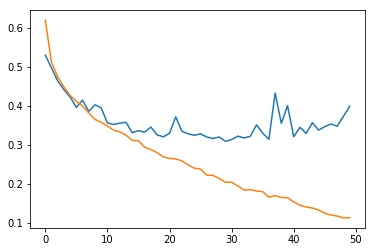

In [61]:
plt.plot(model.history.history['val_loss'])
plt.plot(model.history.history['loss'])
plt.show()

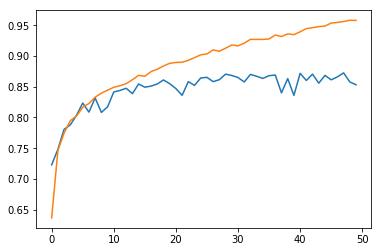

In [62]:
plt.plot(model.history.history['val_acc'])
plt.plot(model.history.history['acc'])
plt.show()

In [64]:
import numpy as np
np.save('history_50_epochs',model.history.history)